In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df=pd.read_csv('soccer.csv')
df.head()

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
0,Spain,La Liga,(BET),Juanmi Callejon,19,16,1849,11,6.62,0.34,48,20,2.47,1.03,2016
1,Spain,La Liga,(BAR),Antoine Griezmann,36,0,3129,16,11.86,0.36,88,41,2.67,1.24,2016
2,Spain,La Liga,(ATL),Luis Suarez,34,1,2940,28,23.21,0.75,120,57,3.88,1.84,2016
3,Spain,La Liga,(CAR),Ruben Castro,32,3,2842,13,14.06,0.47,117,42,3.91,1.40,2016
4,Spain,La Liga,(VAL),Kevin Gameiro,21,10,1745,13,10.65,0.58,50,23,2.72,1.25,2016


In [4]:
df.shape

(660, 15)

In [5]:
df.isnull().sum()

Country                    0
League                     0
Club                       0
Player Names               0
Matches_Played             0
Substitution               0
Mins                       0
Goals                      0
xG                         0
xG Per Avg Match           0
Shots                      0
OnTarget                   0
Shots Per Avg Match        0
On Target Per Avg Match    0
Year                       0
dtype: int64

# Q1: What is the total number of goals scored in the entire dataset?




In [6]:
total_goals = df['Goals'].sum()

print("Total number of goals scored:", total_goals)

Total number of goals scored: 7795


# Q2: Which player has scored the most goals as a substitution

# Q3: Find the top 5 players with the most number of goals scored. Also find the total number of goals scored by them

In [8]:
top_players = df.nlargest(5, 'Goals')
total_goals_top_players = top_players['Goals'].sum()

print("Top 5 players with the most goals:")
print(top_players[['Player Names', 'Goals']])
print("Total number of goals scored by the top 5 players:", total_goals_top_players)


Top 5 players with the most goals:
          Player Names  Goals
5    Cristiano Ronaldo     42
12        Lionel Messi     37
195       Lionel Messi     36
317        Carlos Vela     36
391      Ciro Immobile     36
Total number of goals scored by the top 5 players: 187


Text(0, 0.5, 'Goals')

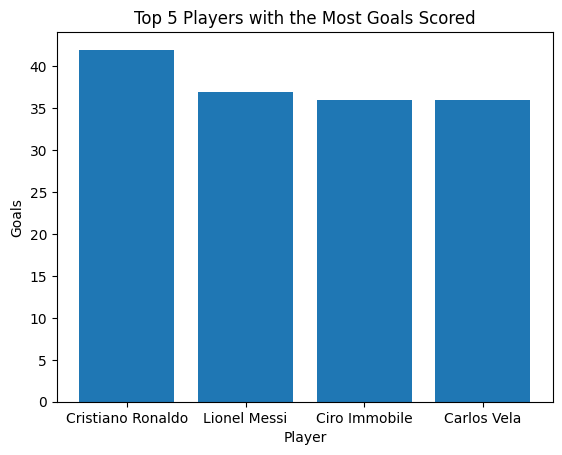

In [9]:
#using another method and visualize
s = df.sort_values("Goals", ascending=False)
top_5_players = s.head(5)
plt.bar(top_5_players["Player Names"], top_5_players["Goals"])
plt.title("Top 5 Players with the Most Goals Scored")
plt.xlabel("Player")
plt.ylabel("Goals")

# Q4: What are the top 10 countries with the most number of players in the dataset?

In [10]:
top10=df.groupby(["Country"])["Player Names"].nunique().sort_values(ascending=False).head(10)
top10

Country
Brazil          76
Germany         62
Spain           62
England         55
Italy           55
France          47
Portugal        37
 Netherlands    34
USA             34
Name: Player Names, dtype: int64

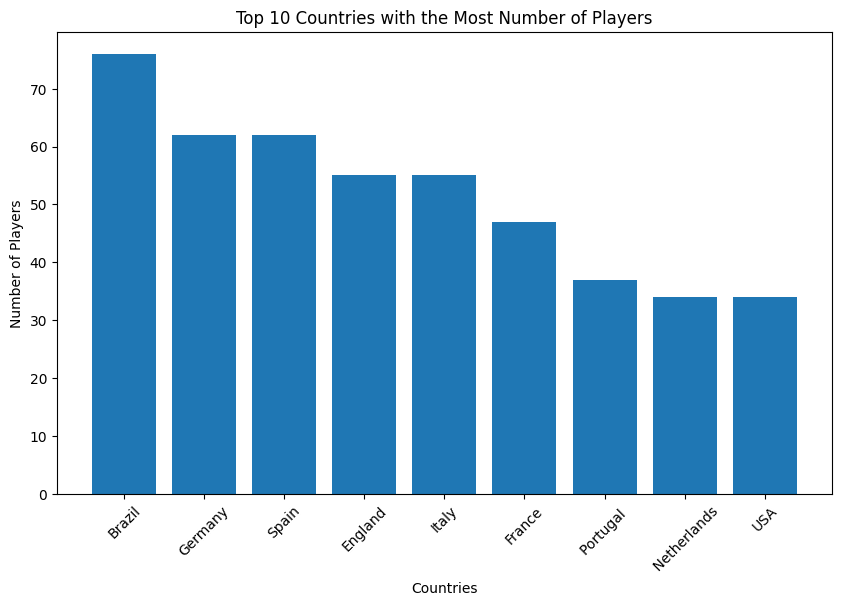

In [12]:

plt.figure(figsize=(10, 6))
plt.bar(top10.index, top10.values)
plt.xlabel('Countries')
plt.ylabel('Number of Players')
plt.title('Top 10 Countries with the Most Number of Players')
plt.xticks(rotation=45)
plt.show()

# Q5: # Q1. Create a new dataframe after removing the ourliers for Mins Column in the dataset (conside the upper quantile to be 99 percentile and the lower quantile to be 1 percentile.). After that Find the difference in the number of rows?

* Difference is df.shape(only rows) - df.shape(rows of filtered data only)

In [13]:
upper_quantile = df['Mins'].quantile(0.99)
lower_quantile = df['Mins'].quantile(0.01)
filtered_df = df[(df['Mins'] <= upper_quantile) & (df['Mins'] >= lower_quantile)]
row_difference = df.shape[0] - filtered_df.shape[0]
print("Difference in the number of rows:", row_difference)

Difference in the number of rows: 14


# Q6: Which top 5 players have scored the maximum number of goals throughout all the years? Display them in descending order

In [14]:
top_players = df.groupby('Player Names')['Goals'].sum().nlargest(5).reset_index()
top_players = top_players.sort_values('Goals', ascending=False)
print("Top 5 players with the maximum number of goals throughout all the years:")
print(top_players)

Top 5 players with the maximum number of goals throughout all the years:
         Player Names  Goals
0        Lionel Messi    135
1   Cristiano Ronaldo    128
2  Robert Lewandowski    127
3       Ciro Immobile    107
4         Luis Suarez     95


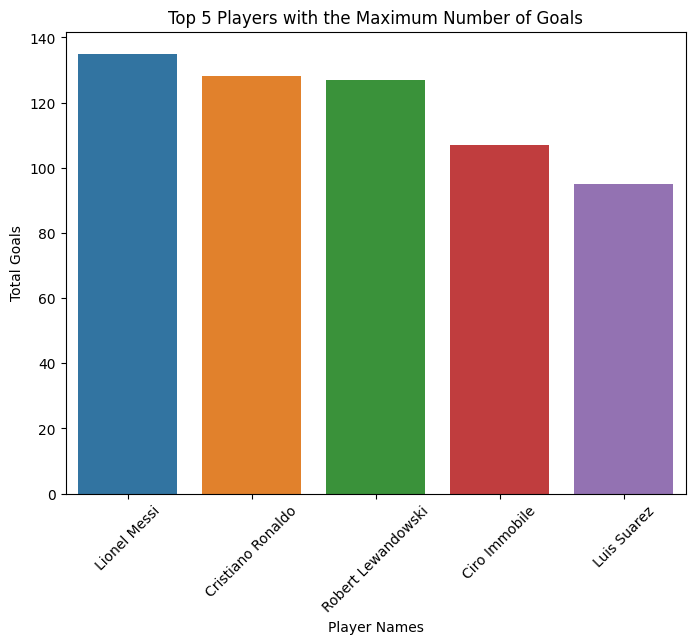

In [15]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Player Names', y='Goals', data=top_players)
plt.xlabel('Player Names')
plt.ylabel('Total Goals')
plt.title('Top 5 Players with the Maximum Number of Goals')
plt.xticks(rotation=45)
plt.show()

# Q7. Using Bar Plot show in which year has Cristiano Ronaldo scored the most number of goals?

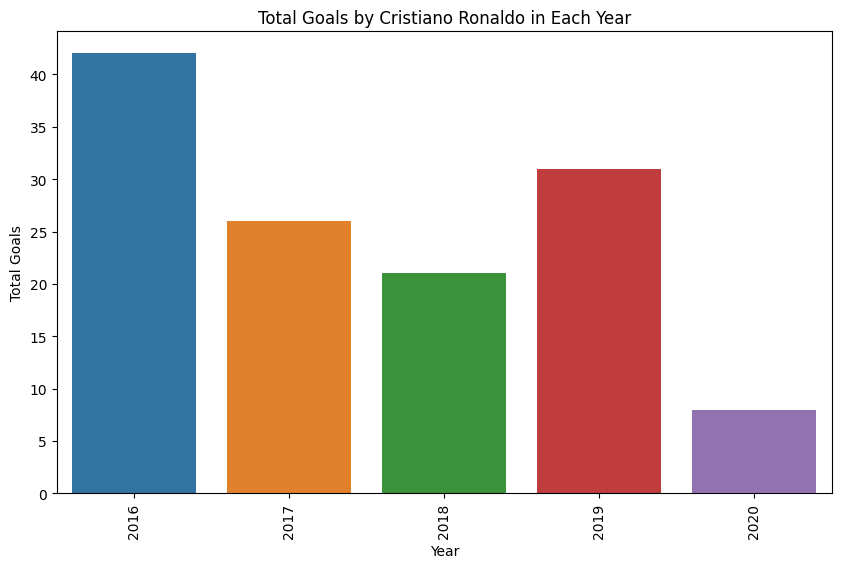

In [16]:
ronaldo_data = df[df['Player Names'] == 'Cristiano Ronaldo']
goals_by_year = ronaldo_data.groupby('Year')['Goals'].sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=goals_by_year.index, y=goals_by_year.values)
plt.xlabel('Year')
plt.ylabel('Total Goals')
plt.title('Total Goals by Cristiano Ronaldo in Each Year')
plt.xticks(rotation=90)
plt.show()

# Q8. In the year 2019 who has more Goals between Ronaldo and Messi? 
- First print them normally 
- Display the comparison using a bar plot

Cristiano Ronaldo's goals in 2019: 31
Lionel Messi's goals in 2019: 25


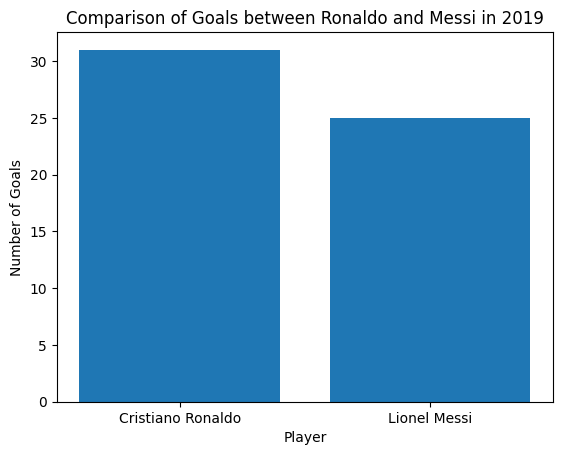

In [20]:

ronaldo_2019 = df[(df['Year'] == 2019) & (df['Player Names'] == 'Cristiano Ronaldo')]
messi_2019 = df[(df['Year'] == 2019) & (df['Player Names'] == 'Lionel Messi')]
print("Cristiano Ronaldo's goals in 2019:", ronaldo_2019['Goals'].values[0])
print("Lionel Messi's goals in 2019:", messi_2019['Goals'].values[0])
players = ['Cristiano Ronaldo', 'Lionel Messi']
goals = [ronaldo_2019['Goals'].values[0], messi_2019['Goals'].values[0]]
plt.bar(players, goals)
plt.xlabel('Player')
plt.ylabel('Number of Goals')
plt.title('Comparison of Goals between Ronaldo and Messi in 2019')
plt.show()

# Q9: Using Pie Chart show the amount of data various Countries are containing in this dataset(use the Country Columns Display the percentage of data as well in the pie chart

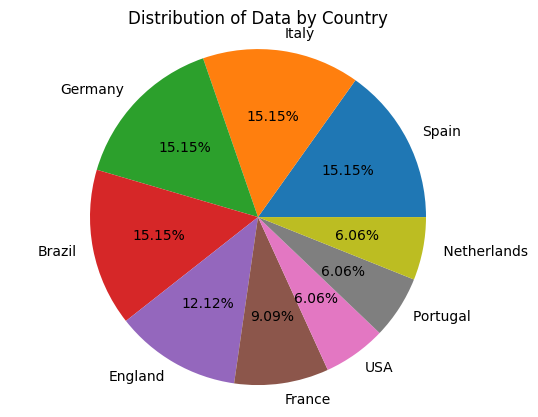

In [21]:
country_counts = df['Country'].value_counts()
labels = country_counts.index
sizes = country_counts.values
plt.pie(sizes, labels=labels, autopct='%1.2f%%')
plt.title('Distribution of Data by Country')
plt.axis('equal')
plt.show()

# Q10: Display a Heatmap  to show the correlation between the columns in the dataset. The heatmap should have the value of the correlation printed within the boxes.

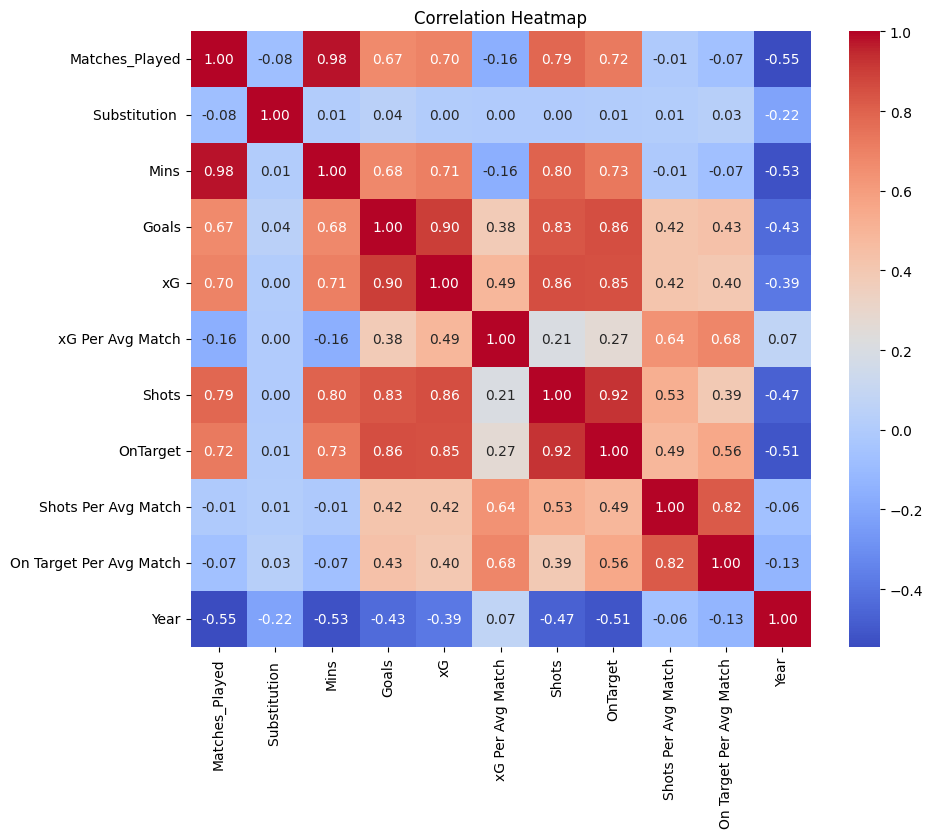

In [22]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

# Q11: Which Country has the maximum median OnTarget Shots among all the Countries in the year 2020?

In [23]:
df_2020 = df[df['Year'] == 2020]
median_ontarget_shots_by_country = df_2020.groupby('Country')['OnTarget'].median()
country_with_max_median_ontarget_shots = median_ontarget_shots_by_country.idxmax()
print("Country with the maximum median OnTarget Shots in 2020:", country_with_max_median_ontarget_shots)

Country with the maximum median OnTarget Shots in 2020:  Netherlands


# Q12. Who has the best average  Goals per minute?
* Consider only those players who have played more than 30 games
* Then Find Goals per minute
* Find Mean of Goals per minute and sort the values

In [24]:
filtered_df = df[df['Matches_Played'] > 30]
filtered_df['Goals_Per_Minute'] = filtered_df['Goals'] / filtered_df['Mins']
mean_goals_per_minute = filtered_df['Goals_Per_Minute'].mean()
sorted_df = filtered_df.sort_values('Goals_Per_Minute', ascending=False)
best_players = sorted_df[['Player Names', 'Goals_Per_Minute']].head()
print("Players with the best average goals per minute:")
print(best_players)

Players with the best average goals per minute:
                  Player Names  Goals_Per_Minute
12                Lionel Messi          0.012715
408         Robert Lewandowski          0.012217
317                Carlos Vela          0.011509
54   Pierre-Emerick Aubameyang          0.010712
391              Ciro Immobile          0.010679


# Q 13. Which Player has the least and most number of missed shots in the dataset?
* Missed Shots=Shots-On Target

In [25]:
missed_shots_by_player = df.groupby('Player Names')['Shots'].sum() - df.groupby('Player Names')['OnTarget'].sum()
player_with_least_missed_shots = missed_shots_by_player.idxmin()
player_with_most_missed_shots = missed_shots_by_player.idxmax()
print("Player with the least number of missed shots:", player_with_least_missed_shots)
print("Player with the most number of missed shots:", player_with_most_missed_shots)

Player with the least number of missed shots: Esteban Burgos
Player with the most number of missed shots: Cristiano Ronaldo


# Q14: How many countries have had players who played more than 35 matches? Create a bar plot to display the count for each country.

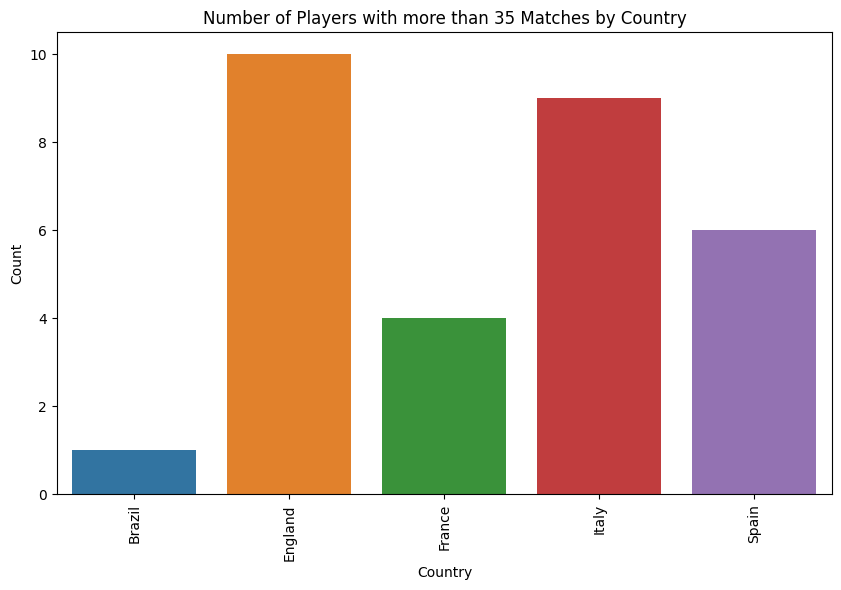

Number of countries with players who played more than 35 matches: 5


In [26]:
filtered_data = df[df['Matches_Played'] > 35]
country_count = filtered_data['Country'].nunique()
country_counts = filtered_data.groupby('Country')['Player Names'].nunique()
plt.figure(figsize=(10, 6))
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Number of Players with more than 35 Matches by Country')
plt.xticks(rotation=90)
plt.show()
print("Number of countries with players who played more than 35 matches:", country_count)

# Q15: Draw a Line Chart to show the comparison of the top 5 highest scoring players in the dataset throughout the years(2016-2020)

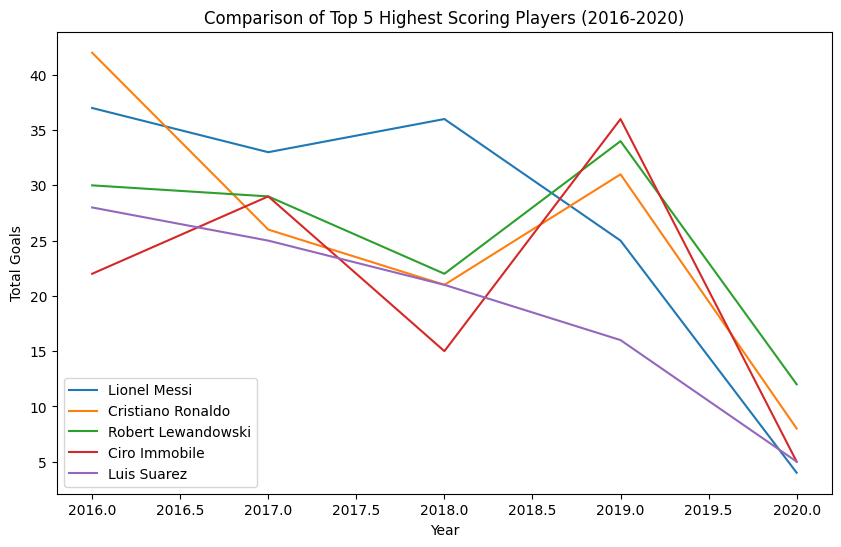

In [27]:
df_filtered = df[(df['Year'] >= 2016) & (df['Year'] <= 2020)]
grouped_data = df_filtered.groupby(['Player Names', 'Year'])['Goals'].sum().reset_index()
top_players = grouped_data.groupby('Player Names')['Goals'].sum().nlargest(5).index
top_players_data = grouped_data[grouped_data['Player Names'].isin(top_players)]
plt.figure(figsize=(10, 6))
for player in top_players:
    player_data = top_players_data[top_players_data['Player Names'] == player]
    plt.plot(player_data['Year'], player_data['Goals'], label=player)
plt.xlabel('Year')
plt.ylabel('Total Goals')
plt.title('Comparison of Top 5 Highest Scoring Players (2016-2020)')
plt.legend()
plt.show()